In [34]:
import matplotlib.pyplot as plt
import numpy as np # used for handling numbers
import tensorflow as tf
import pandas as pd #used for handling the dataset
import seaborn as sns #data visualization
import random
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
import os #to create and remove directories and fetch content from the folders
import cv2

#### convert grayscale

In [36]:
DATADIR = "C:/Users/Acer/Documents/hasani/research/PH2Dataset/PH2images"
CATEGORIES = ["test", "train","validation","atypical nevus", "common nevus","melanoma"]

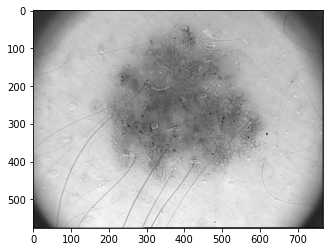

In [63]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path 
    for img in os.listdir(path):  # iterate over each image
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array  #can use rgb2gray(?)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()

        break  
    break  

In [38]:
img_array.shape

(576, 767)

#### resize

#### contrast enhancement

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

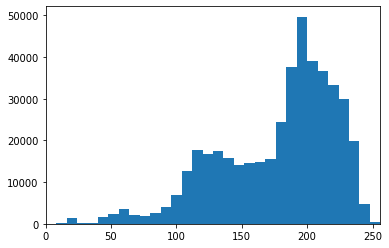

In [42]:
fig, ax = plt.subplots(1, 1)
ax.hist(img_array.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

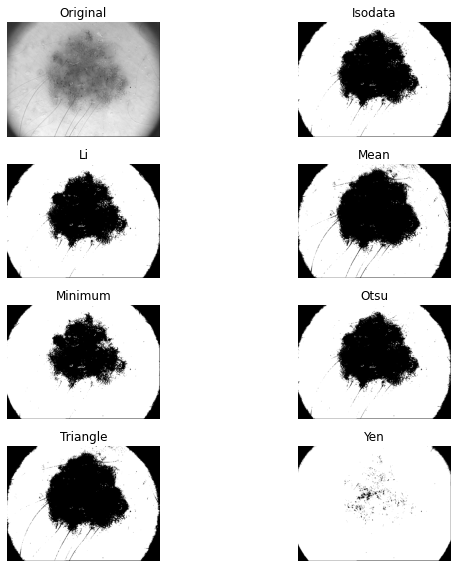

In [54]:
#perform all methods to  find the most suitable one

from skimage.filters import try_all_threshold

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(img_array, figsize=(10, 8), verbose=False)
plt.show()

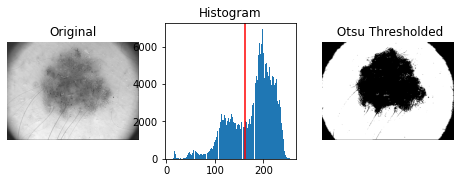

In [56]:
#using otsu

from skimage.filters import threshold_otsu

thresh = threshold_otsu(img_array)
binary_mask = img_array > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(img_array, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(img_array.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary_mask, cmap=plt.cm.gray)
ax[2].set_title(' Otsu Thresholded')
ax[2].axis('off')

plt.show()

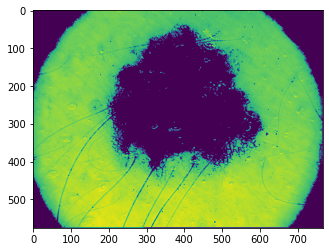

In [64]:
#display the mask and use it to select the foreground


# use the mask to select the "interesting" part of the image
final_img = np.zeros_like(img_array)
final_img[binary_mask] = img_array[binary_mask]

# display the result
plt.imshow(final_img)


#### segmentation

#### classification